<a href="https://colab.research.google.com/github/Topein/Projeto-1-Bootcamp-Data-Science/blob/main/Projeto%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 01 - Bootcamp Data Science 3

Farei uma comparação entre os valores da Produção Hospitalar Brasileira 

In [210]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [211]:
#Setando o estilo dos gráficos pra ggplot
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [212]:
#Importando os dados de taxa de mortalidade publica 
URL = 'https://raw.githubusercontent.com/Topein/Projeto-1-Bootcamp-Data-Science/main/Dados/Taxa_Mortalidade_Publica.csv'
taxa_mortalidade_publica = pd.read_csv(URL, encoding="ISO-8859-1",
                    skiprows = 4, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",", index_col=0).drop('Total', axis=1) #Setando o índice e excluindo a Coluna total, 


taxa_mortalidade_publica.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.43,1.41,1.07,1.04,1.23,1.26,1.47,1.58,1.45,1.83,1.33,1.30,1.55,1.27,1.43,1.63,1.20,1.61,1.61,1.54,1.49,1.62,1.85,1.28,1.72,1.22,1.23,1.51,1.71,1.97,2.12,2.38,2.98,2.03,1.82,2.01,2.13,1.60,1.96,1.98,...,2.78,2.45,2.44,2.23,2.34,2.42,2.64,2.56,2.43,2.72,2.95,2.52,2.18,2.34,2.55,2.41,2.12,1.72,2.53,2.63,2.48,2.84,2.64,2.83,2.73,2.49,2.25,2.54,2.41,2.56,2.51,2.97,2.49,2.39,3.12,2.62,2.91,2.72,2.69,3.22
12 Acre,1.90,3.73,2.41,3.16,3.18,2.21,2.88,3.29,2.57,2.16,1.49,1.79,3.54,2.76,2.57,2.53,2.75,2.06,2.31,2.17,nan,3.19,2.94,3.04,2.72,2.16,3.54,3.41,2.72,2.85,2.49,3.38,3.83,4.37,2.69,3.52,3.54,3.30,2.54,3.66,...,3.02,2.74,2.03,2.82,3.07,2.65,2.62,3.76,2.64,3.10,2.93,2.03,3.73,2.87,2.86,2.64,2.40,2.29,2.10,1.82,1.67,2.32,2.46,2.55,3.56,2.67,3.05,2.90,3.04,3.09,3.97,1.92,3.46,3.27,3.13,3.72,3.87,3.25,3.54,2.58
13 Amazonas,1.76,1.99,2.23,2.29,1.98,1.96,1.97,1.87,1.78,1.63,1.35,1.72,2.14,1.60,1.33,2.22,2.10,2.39,2.12,2.47,2.33,2.01,2.21,2.21,2.12,1.64,1.86,1.82,1.87,2.45,1.82,2.32,2.41,1.94,2.11,1.80,2.18,2.69,2.43,2.56,...,2.61,2.30,2.18,2.44,2.31,2.58,2.39,2.58,2.45,2.63,2.42,2.42,1.43,2.42,2.01,2.23,2.28,2.11,2.34,2.12,2.09,1.84,2.67,1.70,2.07,2.04,2.01,2.12,1.80,1.78,1.93,2.34,2.36,2.22,2.14,2.45,2.75,2.35,2.70,2.41
14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,...,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,1.75,1.44,1.97,1.50,2.25,1.98,1.43,1.75,1.09,1.88,1.66,1.84,1.73,1.88,1.77,2.20,2.59,2.34,2.11,2.05,1.65,1.98,3.08,2.28,2.56,2.68,1.99,2.38,2.81,1.74,1.82
15 Pará,2.26,2.16,2.49,2.05,2.24,2.28,2.71,2.42,2.69,2.31,2.30,2.70,3.05,2.92,2.66,2.59,2.77,2.55,2.65,2.51,2.75,2.45,2.73,2.53,3.23,2.77,2.60,2.67,2.44,2.70,3.06,3.05,2.83,2.76,2.89,2.80,2.99,2.98,2.85,2.50,...,2.80,2.66,3.32,3.10,3.02,3.46,3.30,3.08,2.95,2.79,2.87,3.12,2.88,2.82,3.03,2.82,3.07,2.75,2.93,2.96,3.09,2.83,3.03,3.15,3.11,2.52,3.23,2.84,3.15,2.95,2.91,3.19,3.27,3.39,3.04,3.11,3.04,3.20,3.23,2.97


In [213]:
#Tratando os dados Importados

taxa_mortalidade_publica = taxa_mortalidade_publica.replace('-', np.nan) #substituindo os dados '-' Inexistentes por Nulos (nan)
taxa_mortalidade_publica = taxa_mortalidade_publica.astype('float64') #mudand as colunas para o tipo



In [214]:
#Incluindo a Região nas Taxas de mortalidade Publica
taxa_mortalidade_publica_usaveis = taxa_mortalidade_publica.mean().index.to_list()
taxa_publica_usaveis = taxa_mortalidade_publica[taxa_mortalidade_publica_usaveis]

regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

taxa_publica_usaveis.insert(0, 'Região','')
taxa_publica_usaveis['Região'] = taxa_publica_usaveis.index.str[0].astype(int)

taxa_publica_usaveis['Região'] = taxa_publica_usaveis['Região'].map(regiao)
taxa_publica_usaveis.head()



,Região,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,1.43,1.41,1.07,1.04,1.23,1.26,1.47,1.58,1.45,1.83,1.33,1.30,1.55,1.27,1.43,1.63,1.20,1.61,1.61,1.54,1.49,1.62,1.85,1.28,1.72,1.22,1.23,1.51,1.71,1.97,2.12,2.38,2.98,2.03,1.82,2.01,2.13,1.60,1.96,...,2.78,2.45,2.44,2.23,2.34,2.42,2.64,2.56,2.43,2.72,2.95,2.52,2.18,2.34,2.55,2.41,2.12,1.72,2.53,2.63,2.48,2.84,2.64,2.83,2.73,2.49,2.25,2.54,2.41,2.56,2.51,2.97,2.49,2.39,3.12,2.62,2.91,2.72,2.69,3.22
12 Acre,Norte,1.90,3.73,2.41,3.16,3.18,2.21,2.88,3.29,2.57,2.16,1.49,1.79,3.54,2.76,2.57,2.53,2.75,2.06,2.31,2.17,nan,3.19,2.94,3.04,2.72,2.16,3.54,3.41,2.72,2.85,2.49,3.38,3.83,4.37,2.69,3.52,3.54,3.30,2.54,...,3.02,2.74,2.03,2.82,3.07,2.65,2.62,3.76,2.64,3.10,2.93,2.03,3.73,2.87,2.86,2.64,2.40,2.29,2.10,1.82,1.67,2.32,2.46,2.55,3.56,2.67,3.05,2.90,3.04,3.09,3.97,1.92,3.46,3.27,3.13,3.72,3.87,3.25,3.54,2.58
13 Amazonas,Norte,1.76,1.99,2.23,2.29,1.98,1.96,1.97,1.87,1.78,1.63,1.35,1.72,2.14,1.60,1.33,2.22,2.10,2.39,2.12,2.47,2.33,2.01,2.21,2.21,2.12,1.64,1.86,1.82,1.87,2.45,1.82,2.32,2.41,1.94,2.11,1.80,2.18,2.69,2.43,...,2.61,2.30,2.18,2.44,2.31,2.58,2.39,2.58,2.45,2.63,2.42,2.42,1.43,2.42,2.01,2.23,2.28,2.11,2.34,2.12,2.09,1.84,2.67,1.70,2.07,2.04,2.01,2.12,1.80,1.78,1.93,2.34,2.36,2.22,2.14,2.45,2.75,2.35,2.70,2.41
14 Roraima,Norte,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,2.14,2.29,2.28,2.38,1.61,2.25,2.59,1.87,2.50,1.75,1.44,1.97,1.50,2.25,1.98,1.43,1.75,1.09,1.88,1.66,1.84,1.73,1.88,1.77,2.20,2.59,2.34,2.11,2.05,1.65,1.98,3.08,2.28,2.56,2.68,1.99,2.38,2.81,1.74,1.82
15 Pará,Norte,2.26,2.16,2.49,2.05,2.24,2.28,2.71,2.42,2.69,2.31,2.30,2.70,3.05,2.92,2.66,2.59,2.77,2.55,2.65,2.51,2.75,2.45,2.73,2.53,3.23,2.77,2.60,2.67,2.44,2.70,3.06,3.05,2.83,2.76,2.89,2.80,2.99,2.98,2.85,...,2.80,2.66,3.32,3.10,3.02,3.46,3.30,3.08,2.95,2.79,2.87,3.12,2.88,2.82,3.03,2.82,3.07,2.75,2.93,2.96,3.09,2.83,3.03,3.15,3.11,2.52,3.23,2.84,3.15,2.95,2.91,3.19,3.27,3.39,3.04,3.11,3.04,3.20,3.23,2.97


In [215]:
#Importando os dados de taxa de mortalidade privada

URL = 'https://raw.githubusercontent.com/Topein/Projeto-1-Bootcamp-Data-Science/main/Dados/Taxa_Mortalidade_Privada.csv'
taxa_mortalidade_privada = pd.read_csv(URL, encoding="ISO-8859-1",
                    skiprows = 4, sep=";",skipfooter= 12, 
                    thousands= ".", decimal= ",", index_col=0).drop('Total', axis=1) #Setando o índice e excluindo a Coluna total, 

taxa_mortalidade_privada.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,-,-,0.43,-,-,-,0.31,-,1.89,-,-,-,0.28,-,0.27,-,-,-,-,-,0.30,1.10,5.54,2.34,7.12,3.25,5.20,2.63,4.76,2.28,3.95,5.10,2.63,5.09,2.17,6.00,...,2.10,2.26,2.48,4.07,2.78,3.79,4.35,3.52,6.98,4.73,5.63,5.85,6.06,5.84,3.47,2.83,4.66,5.28,2.78,5.06,5.40,4.42,3.72,4.07,2.62,1.68,2.49,1.57,3.77,3.84,0.72,2.65,1.88,2.81,2.95,3.54,3.23,3.08,4.86,4.66
12 Acre,0.56,1.22,0.68,1.33,0.62,0.40,0.60,0.47,0.98,0.63,0.97,0.78,1.22,0.25,0.93,0.58,0.45,0.88,1.64,0.68,NaN,0.81,0.72,0.27,1.19,0.86,0.68,1.04,1.44,1.22,0.74,1.21,0.53,0.97,1.22,0.77,0.90,1.07,1.14,1.29,...,1.00,0.73,0.83,1.39,1.22,0.38,0.94,0.86,1.29,1.26,0.25,1.45,0.83,1.12,0.97,0.54,1.04,0.57,0.64,0.56,0.84,0.29,0.34,0.80,0.72,1.12,0.93,1.67,1.64,1.89,1.32,0.96,0.82,1.29,1.82,1.03,2.05,1.39,1.53,1.35
13 Amazonas,-,1.01,0.85,1.24,0.78,1.34,0.47,1.18,0.38,0.80,0.12,0.82,1.46,0.62,0.63,0.63,1.63,1.09,1.49,0.95,1.33,1.58,0.58,0.83,0.71,1.44,0.86,1.11,1.50,1.81,1.49,1.85,1.02,0.15,1.68,2.70,2.84,1.71,1.70,2.28,...,0.49,2.41,3.67,1.72,1.02,0.56,2.31,1.35,1.96,2.55,1.06,1.13,1.41,1.62,2.19,2.36,0.86,1.28,2.54,2.38,1.88,2.74,3.16,1.58,2.41,1.40,1.68,2.02,1.83,2.12,1.78,2.38,2.80,2.40,2.06,2.53,2.47,2.41,2.38,1.49
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,nan,NaN,nan,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-,-,-,-,-,-,-,nan,-,-,-,1.60,-,-,-
15 Pará,0.83,0.77,0.70,0.63,0.68,0.75,0.75,0.76,0.95,0.96,0.57,0.47,0.53,0.57,0.62,0.74,0.78,0.68,0.73,0.68,0.73,0.80,0.67,0.57,0.67,0.59,0.62,0.63,0.57,0.68,0.62,0.77,0.67,0.73,0.67,0.54,0.65,0.60,0.77,0.76,...,0.90,1.00,0.86,0.79,0.87,0.92,0.84,0.78,0.81,0.75,0.72,0.85,0.84,0.91,0.92,0.82,0.87,0.77,0.92,0.86,0.88,0.93,0.85,0.95,0.80,1.02,0.86,0.88,0.80,0.88,0.90,1.07,0.97,0.91,1.04,1.01,1.04,1.13,0.86,0.89


In [216]:
#Tratando os dados Importados

taxa_mortalidade_privada = taxa_mortalidade_privada.replace('-', np.nan) #substituindo os dados '-' Inexistentes por Nulos (nan)
taxa_mortalidade_privada = taxa_mortalidade_privada.astype('float64') #mudand as colunas para o tipo float64


taxa_mortalidade_privada.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,nan,nan,nan,nan,nan,nan,0.43,nan,nan,nan,0.31,nan,1.89,nan,nan,nan,0.28,nan,0.27,nan,nan,nan,nan,nan,0.30,1.10,5.54,2.34,7.12,3.25,5.20,2.63,4.76,2.28,3.95,5.10,2.63,5.09,2.17,6.00,...,2.10,2.26,2.48,4.07,2.78,3.79,4.35,3.52,6.98,4.73,5.63,5.85,6.06,5.84,3.47,2.83,4.66,5.28,2.78,5.06,5.40,4.42,3.72,4.07,2.62,1.68,2.49,1.57,3.77,3.84,0.72,2.65,1.88,2.81,2.95,3.54,3.23,3.08,4.86,4.66
12 Acre,0.56,1.22,0.68,1.33,0.62,0.40,0.60,0.47,0.98,0.63,0.97,0.78,1.22,0.25,0.93,0.58,0.45,0.88,1.64,0.68,nan,0.81,0.72,0.27,1.19,0.86,0.68,1.04,1.44,1.22,0.74,1.21,0.53,0.97,1.22,0.77,0.90,1.07,1.14,1.29,...,1.00,0.73,0.83,1.39,1.22,0.38,0.94,0.86,1.29,1.26,0.25,1.45,0.83,1.12,0.97,0.54,1.04,0.57,0.64,0.56,0.84,0.29,0.34,0.80,0.72,1.12,0.93,1.67,1.64,1.89,1.32,0.96,0.82,1.29,1.82,1.03,2.05,1.39,1.53,1.35
13 Amazonas,nan,1.01,0.85,1.24,0.78,1.34,0.47,1.18,0.38,0.80,0.12,0.82,1.46,0.62,0.63,0.63,1.63,1.09,1.49,0.95,1.33,1.58,0.58,0.83,0.71,1.44,0.86,1.11,1.50,1.81,1.49,1.85,1.02,0.15,1.68,2.70,2.84,1.71,1.70,2.28,...,0.49,2.41,3.67,1.72,1.02,0.56,2.31,1.35,1.96,2.55,1.06,1.13,1.41,1.62,2.19,2.36,0.86,1.28,2.54,2.38,1.88,2.74,3.16,1.58,2.41,1.40,1.68,2.02,1.83,2.12,1.78,2.38,2.80,2.40,2.06,2.53,2.47,2.41,2.38,1.49
14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.60,nan,nan,nan
15 Pará,0.83,0.77,0.70,0.63,0.68,0.75,0.75,0.76,0.95,0.96,0.57,0.47,0.53,0.57,0.62,0.74,0.78,0.68,0.73,0.68,0.73,0.80,0.67,0.57,0.67,0.59,0.62,0.63,0.57,0.68,0.62,0.77,0.67,0.73,0.67,0.54,0.65,0.60,0.77,0.76,...,0.90,1.00,0.86,0.79,0.87,0.92,0.84,0.78,0.81,0.75,0.72,0.85,0.84,0.91,0.92,0.82,0.87,0.77,0.92,0.86,0.88,0.93,0.85,0.95,0.80,1.02,0.86,0.88,0.80,0.88,0.90,1.07,0.97,0.91,1.04,1.01,1.04,1.13,0.86,0.89


In [217]:
#Incluindo a Região nas Taxas de mortalidade Privada
taxa_mortalidade_privada_usaveis = taxa_mortalidade_privada.mean().index.to_list()
taxa_privada_usaveis = taxa_mortalidade_privada[taxa_mortalidade_privada_usaveis]

regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

taxa_privada_usaveis.insert(0, 'Região','')
taxa_privada_usaveis['Região'] = taxa_privada_usaveis.index.str[0].astype(int)

taxa_privada_usaveis['Região'] = taxa_privada_usaveis['Região'].map(regiao)
taxa_privada_usaveis.head()


,Região,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,nan,nan,nan,nan,nan,nan,0.43,nan,nan,nan,0.31,nan,1.89,nan,nan,nan,0.28,nan,0.27,nan,nan,nan,nan,nan,0.30,1.10,5.54,2.34,7.12,3.25,5.20,2.63,4.76,2.28,3.95,5.10,2.63,5.09,2.17,...,2.10,2.26,2.48,4.07,2.78,3.79,4.35,3.52,6.98,4.73,5.63,5.85,6.06,5.84,3.47,2.83,4.66,5.28,2.78,5.06,5.40,4.42,3.72,4.07,2.62,1.68,2.49,1.57,3.77,3.84,0.72,2.65,1.88,2.81,2.95,3.54,3.23,3.08,4.86,4.66
12 Acre,Norte,0.56,1.22,0.68,1.33,0.62,0.40,0.60,0.47,0.98,0.63,0.97,0.78,1.22,0.25,0.93,0.58,0.45,0.88,1.64,0.68,nan,0.81,0.72,0.27,1.19,0.86,0.68,1.04,1.44,1.22,0.74,1.21,0.53,0.97,1.22,0.77,0.90,1.07,1.14,...,1.00,0.73,0.83,1.39,1.22,0.38,0.94,0.86,1.29,1.26,0.25,1.45,0.83,1.12,0.97,0.54,1.04,0.57,0.64,0.56,0.84,0.29,0.34,0.80,0.72,1.12,0.93,1.67,1.64,1.89,1.32,0.96,0.82,1.29,1.82,1.03,2.05,1.39,1.53,1.35
13 Amazonas,Norte,nan,1.01,0.85,1.24,0.78,1.34,0.47,1.18,0.38,0.80,0.12,0.82,1.46,0.62,0.63,0.63,1.63,1.09,1.49,0.95,1.33,1.58,0.58,0.83,0.71,1.44,0.86,1.11,1.50,1.81,1.49,1.85,1.02,0.15,1.68,2.70,2.84,1.71,1.70,...,0.49,2.41,3.67,1.72,1.02,0.56,2.31,1.35,1.96,2.55,1.06,1.13,1.41,1.62,2.19,2.36,0.86,1.28,2.54,2.38,1.88,2.74,3.16,1.58,2.41,1.40,1.68,2.02,1.83,2.12,1.78,2.38,2.80,2.40,2.06,2.53,2.47,2.41,2.38,1.49
14 Roraima,Norte,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.60,nan,nan,nan
15 Pará,Norte,0.83,0.77,0.70,0.63,0.68,0.75,0.75,0.76,0.95,0.96,0.57,0.47,0.53,0.57,0.62,0.74,0.78,0.68,0.73,0.68,0.73,0.80,0.67,0.57,0.67,0.59,0.62,0.63,0.57,0.68,0.62,0.77,0.67,0.73,0.67,0.54,0.65,0.60,0.77,...,0.90,1.00,0.86,0.79,0.87,0.92,0.84,0.78,0.81,0.75,0.72,0.85,0.84,0.91,0.92,0.82,0.87,0.77,0.92,0.86,0.88,0.93,0.85,0.95,0.80,1.02,0.86,0.88,0.80,0.88,0.90,1.07,0.97,0.91,1.04,1.01,1.04,1.13,0.86,0.89


In [218]:
#Meses usaveis

#taxa_privada_usaveis = taxa_privada_usaveis.columns[47:150] 
meses = taxa_mortalidade_publica.columns[24:]
meses



Index(['2010/Jan', '2010/Fev', '2010/Mar', '2010/Abr', '2010/Mai', '2010/Jun',
       '2010/Jul', '2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez',
       '2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun',
       '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez',
       '2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun',
       '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez',
       '2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun',
       '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez',
       '2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun',
       '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
       '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun',
       '2015/Jul', '2015/Ago', '2015/Set', '2015/Out'],
      dtype='object')

In [219]:
taxa_mortalidade_publica = taxa_mortalidade_publica[taxa_mortalidade_privada.columns[24:]]
taxa_mortalidade_privada = taxa_mortalidade_privada[taxa_mortalidade_privada.columns[24:]]

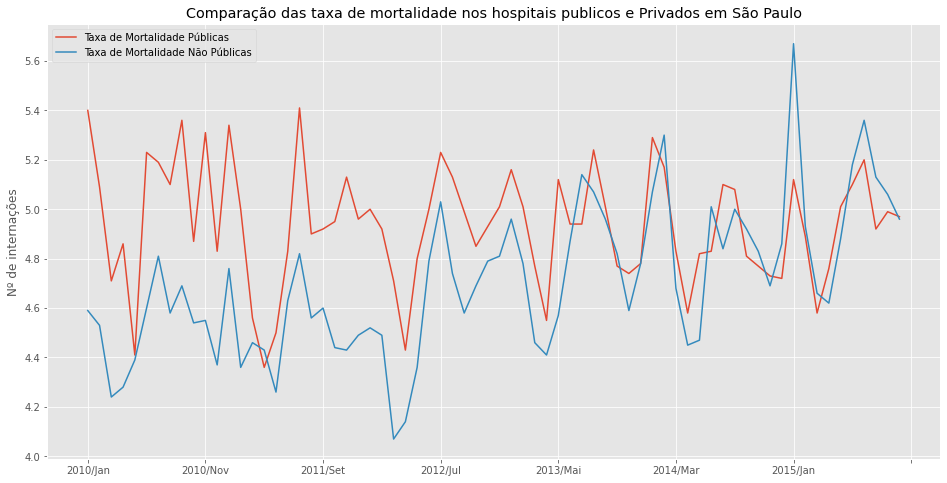

In [220]:
ax = taxa_mortalidade_publica.loc["35 São Paulo"].T.plot(figsize=(16,8), ylabel="Nº de internações")
taxa_mortalidade_privada.loc["35 São Paulo"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade Públicas", "Taxa de Mortalidade Não Públicas"])
plt.title('Comparação das taxa de mortalidade nos hospitais publicos e Privados em São Paulo')
plt.show()

In [225]:
ax = taxa_mortalidade_publica.T.plot(x="Unidade da Federação" figsize=(16,8), ylabel="Nº de internações")
taxa_mortalidade_privada["Unidade da Federação"].T.plot(ax=ax)
ax.legend(["Taxa de Mortalidade Públicas", "Taxa de Mortalidade Não Públicas"])
plt.title('Comparação das taxa de mortalidade nos hospitais publicos e Privados em São Paulo')
plt.show()

SyntaxError: ignored